In [50]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import sqlite3

# Reflect Tables into SQLAlchemy ORM

In [17]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [18]:
engine = create_engine("sqlite:///Resources/database.sqlite")

In [19]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [20]:
# We can view all of the classes that automap found
Base.classes.keys()

['Salaries']

In [21]:
# Save references to each table
Salary = Base.classes.Salaries

In [22]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [52]:
con = sqlite3.connect("../Resources/database.sqlite")
df = pd.read_sql_query('SELECT * FROM Salaries', con)
df

OperationalError: unable to open database file

# Exploratory Climate Analysis

In [36]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
Salary_data = session.query(Salary.TotalPayBenefits).order_by(Salary.TotalPayBenefits.desc()).first()
Salary_data

(Decimal('567595.4300000001'))

In [40]:
# Perform a query to retrieve the data and precipitation scores
Total_pay = session.query(Salary.Year, Salary.TotalPayBenefits).\
        filter(Salary.Year == 2011).\
        order_by(Salary.Year).all()
Total_pay_df = pd.DataFrame(Total_pay)
Total_pay_df.head()

Year   TotalPayBenefits
0  2011  567595.4300000001
1  2011  538909.2800000000
2  2011  335279.9100000000
3  2011  332343.6100000000
4  2011  326373.1900000000

In [41]:
# Perform a query to retrieve the data and precipitation scores
Total_pay = session.query(Salary.Year, Salary.TotalPayBenefits).\
        filter(Salary.Year == 2012).\
        order_by(Salary.Year).all()
Total_pay_df = pd.DataFrame(Total_pay)
Total_pay_df.head()

Year   TotalPayBenefits
0  2012  407274.7800000000
1  2012  391362.3000000000
2  2012  389496.0200000000
3  2012  386807.4800000000
4  2012  381643.1100000000

In [42]:
# Perform a query to retrieve the data and precipitation scores
Total_pay = session.query(Salary.Year, Salary.TotalPayBenefits).\
        filter(Salary.Year == 2013).\
        order_by(Salary.Year).all()
Total_pay_df = pd.DataFrame(Total_pay)
Total_pay_df.head()

Year   TotalPayBenefits
0  2013  425815.2800000000
1  2013  422353.4000000000
2  2013  404167.2700000000
3  2013  401736.8800000000
4  2013  398421.6700000000

In [43]:
# Perform a query to retrieve the data and precipitation scores
Total_pay = session.query(Salary.Year, Salary.TotalPayBenefits).\
        filter(Salary.Year == 2014).\
        order_by(Salary.Year).all()
Total_pay_df = pd.DataFrame(Total_pay)
Total_pay_df.head()

Year   TotalPayBenefits
0  2014  510732.6800000000
1  2014  479652.2100000000
2  2014  436224.3600000000
3  2014  418019.2200000000
4  2014  417435.1000000000

In [45]:
# Use Pandas Plotting with Matplotlib to plot the data
Total_pay_df.plot(x='Year', y='TotalPayBenefits', figsize=(10,5))
l=plt.legend(bbox_to_anchor=(0.8, 1.00))
l.get_texts()[0].set_text('TotalPay')
plt.xlabel("Year")
plt.ylabel("Dollars")
plt.tight_layout()

plt.title("SF Total Salary 2011 - 2014")
plt.savefig("Output_Images/Total Salary 2011 - 2014.png")
plt.show()

TypeError: no numeric data to plot

In [46]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Total_pay_df.describe()

Year
count  38123.0
mean    2014.0
std        0.0
min     2014.0
25%     2014.0
50%     2014.0
75%     2014.0
max     2014.0

In [132]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Station).group_by(Station.station).count()
print("There are {} available in this dataset".format(stations))

There are 9 available in this dataset


In [133]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_station = session.query(Measurement.station,func.count(Measurement.station))\
                                                        .group_by(Measurement.station)\
                                                        .order_by(func.count(Measurement.station).desc()).all()
print("Rank\tStation ID\tObservations")
i=1
for stations in most_active_station:
    print("%d\t%s\t%d" %(i,stations[0],stations[1]))
    i+=1          
        

Rank	Station ID	Observations
1	USC00519281	2772
2	USC00519397	2724
3	USC00513117	2709
4	USC00519523	2669
5	USC00516128	2612
6	USC00514830	2202
7	USC00511918	1979
8	USC00517948	1372
9	USC00518838	511


In [134]:
print('The most active station is:' ,most_active_station[0][0])

The most active station is: USC00519281


In [135]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
lowest_temp = session.query(func.min(Measurement.tobs)).all()
highest_temp = session.query(func.max(Measurement.tobs)).all()
avg_temp = session.query(func.avg(Measurement.tobs)).all()

print(lowest_temp, highest_temp, avg_temp)

[(53.0,)] [(87.0,)] [(73.09795396419437,)]


In [136]:
# Choose the station with the highest number of temperature observations and
#Query the last 12 months of temperature observation data for this station
temp_data = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
                            filter(Measurement.station == most_active_station[0][0]).\
                            filter(func.datetime(Measurement.date) >= one_year_date).\
                            order_by(Measurement.date.desc()).all()
temp_data

[('USC00519281', '2017-08-18', 79.0),
 ('USC00519281', '2017-08-17', 76.0),
 ('USC00519281', '2017-08-16', 76.0),
 ('USC00519281', '2017-08-15', 77.0),
 ('USC00519281', '2017-08-14', 77.0),
 ('USC00519281', '2017-08-13', 77.0),
 ('USC00519281', '2017-08-06', 83.0),
 ('USC00519281', '2017-08-05', 82.0),
 ('USC00519281', '2017-08-04', 77.0),
 ('USC00519281', '2017-07-31', 76.0),
 ('USC00519281', '2017-07-30', 81.0),
 ('USC00519281', '2017-07-29', 82.0),
 ('USC00519281', '2017-07-28', 81.0),
 ('USC00519281', '2017-07-27', 76.0),
 ('USC00519281', '2017-07-26', 75.0),
 ('USC00519281', '2017-07-25', 77.0),
 ('USC00519281', '2017-07-24', 75.0),
 ('USC00519281', '2017-07-23', 82.0),
 ('USC00519281', '2017-07-22', 77.0),
 ('USC00519281', '2017-07-21', 77.0),
 ('USC00519281', '2017-07-20', 77.0),
 ('USC00519281', '2017-07-19', 76.0),
 ('USC00519281', '2017-07-18', 76.0),
 ('USC00519281', '2017-07-17', 76.0),
 ('USC00519281', '2017-07-16', 80.0),
 ('USC00519281', '2017-07-15', 80.0),
 ('USC005192

In [137]:
temp_df = pd.DataFrame(temp_data, columns=["Station ID", "Date", "Tobs"])
temp_df.head()


Station ID        Date  Tobs
0  USC00519281  2017-08-18  79.0
1  USC00519281  2017-08-17  76.0
2  USC00519281  2017-08-16  76.0
3  USC00519281  2017-08-15  77.0
4  USC00519281  2017-08-14  77.0

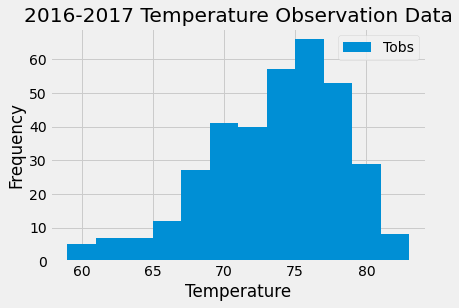

In [138]:
## plot the results as a histogram
plt.hist(temp_df['Tobs'],bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(["Tobs"])
plt.title("2016-2017 Temperature Observation Data")
plt.savefig("Output_Images/Temperature Observation Data 2016-2017.png")
plt.show()

## Bonus Challenge Assignment

In [139]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))


[(62.0, 69.57142857142857, 74.0)]


In [140]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
temp_trip = calc_temps('2017-02-28', '2017-03-05')
temp_trip[0]

(64.0, 72.02777777777777, 78.0)

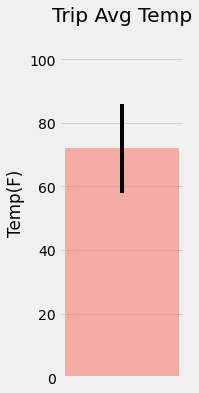

In [141]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
yerr_t = temp_trip[0][2] - temp_trip[0][0]
plt.figure(figsize=(2,6))
plt.bar(1,temp_trip[0][1], yerr=yerr_t, color='salmon',alpha=0.6)
plt.title("Trip Avg Temp")
plt.xticks([ ])
plt.ylim(0,110)
plt.ylabel("Temp(F)")


plt.savefig("Output_Images/Trip Avg Temp.png")
plt.show()

In [142]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
start_date = '2017-02-28'
end_date = '2017-03-05'

rainfall_per_station = session.query(Measurement.station, Measurement.prcp, Station.name, Station.latitude, Station.longitude, Station.elevation).\
                            filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).\
                            join(Station, Measurement.station==Station.station).\
                            group_by(Measurement.station).\
                            order_by(func.sum(Measurement.prcp).desc()).all()

rainfall_per_station

[('USC00519281',
  0.41,
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9),
 ('USC00513117', 0.1, 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 ('USC00516128',
  0.35,
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4),
 ('USC00517948', 0.14, 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 ('USC00519397', 0.35, 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00519523',
  0.0,
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5),
 ('USC00514830',
  None,
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0)]

In [143]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]